In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import matplotlib.pyplot as plt

In [37]:
from rlway.schedules import Schedule
schedule = Schedule(10,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN

In [38]:
schedule._df.index=[
    "S1",
    "S2",
    "CVG1",
    "T1",
    "S3",
    "CVG2",
    "T2",
    "DVG",
    "A1",
    "A2"
]

In [39]:
schedule

        0         1         2     
        s    e    s    e    s    e
S1    NaN  NaN  NaN  NaN  NaN  NaN
S2    NaN  NaN  NaN  NaN  NaN  NaN
CVG1  NaN  NaN  NaN  NaN  NaN  NaN
T1    NaN  NaN  NaN  NaN  NaN  NaN
S3    NaN  NaN  NaN  NaN  NaN  NaN
CVG2  NaN  NaN  NaN  NaN  NaN  NaN
T2    NaN  NaN  NaN  NaN  NaN  NaN
DVG   NaN  NaN  NaN  NaN  NaN  NaN
A1    NaN  NaN  NaN  NaN  NaN  NaN
A2    NaN  NaN  NaN  NaN  NaN  NaN

In [40]:
schedule.df.at['S1', 0] =  [0, 1]
schedule.df.at['CVG1', 0] = [1, 2]
schedule.df.at['T1', 0] =  [2, 4]
schedule.df.at['CVG2', 0] =  [4, 5]
schedule.df.at['T2', 0] =  [5, 7]
schedule.df.at['DVG', 0] =  [7, 8]
schedule.df.at['A1', 0] =  [8, 9]

schedule.df.at['S2', 1] =  [4, 5]
schedule.df.at['CVG1', 1] = [5, 6]
schedule.df.at['T1', 1] =  [6, 8]
schedule.df.at['CVG2', 1] =  [8, 9]
schedule.df.at['T2', 1] =  [9, 11]
schedule.df.at['DVG', 1] =  [11, 12]
schedule.df.at['A2', 1] =  [12, 13]


schedule.df.at['S3', 2] =  [2, 3]
schedule.df.at['CVG2', 2] =  [6, 7]
schedule.df.at['T2', 2] =  [7, 9]
schedule.df.at['DVG', 2] =  [9, 11]
schedule.df.at['A1', 2] =  [11, 12]

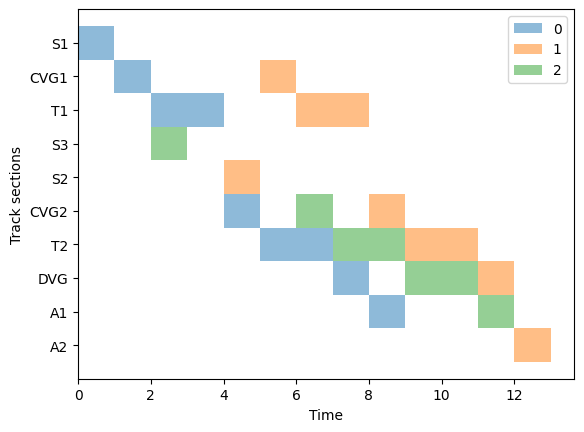

In [41]:
schedule.sort().plot()

In [42]:
from rlway.regul_env import RegulEnv

env = RegulEnv(schedule.sort(), stations=['A1', 'A2'])

In [43]:
env.reset(delay=.33, train=0, track_section='S1')

({'delayed_train': 0,
  'timetable': array([[0, 1.33, nan, nan, nan, nan],
         [1.33, 2.33, 5, 6, nan, nan],
         [2.33, 4.33, 6, 8, nan, nan],
         [nan, nan, nan, nan, 2, 3],
         [nan, nan, 4, 5, nan, nan],
         [4.33, 5.33, 8, 9, 6, 7],
         [5.33, 7.33, 9, 11, 7, 9],
         [7.33, 8.33, 11, 12, 9, 11],
         [8.33, 9.33, nan, nan, 11, 12],
         [nan, nan, 12, 13, nan, nan]], dtype=object)},
 {})

In [44]:
# for actions in product([0,1],[0,1]):
for actions in [[1, 1]]:
    env.reset(delay=2.1, train=0, track_section='S1')
    done = False
    reward = None
    for a in actions:
        if not done:
            _, reward, done, _ = env.step(a)
            print(actions, reward, done)

1 False
[1, 1] -2.1999999999999993 True


Text(0.5, 1.0, "('T1', 0)")

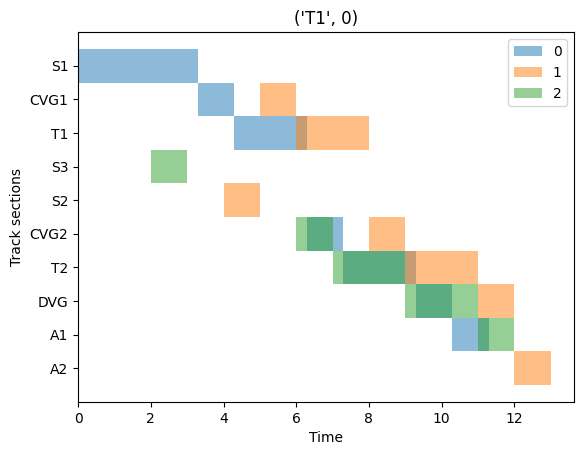

In [139]:
env.reset(delay=2.3, train=0, track_section='S1')
env.render()
plt.title(earliest_conflict(env.schedule))

Text(0.5, 1.0, "('CVG2', 2)")

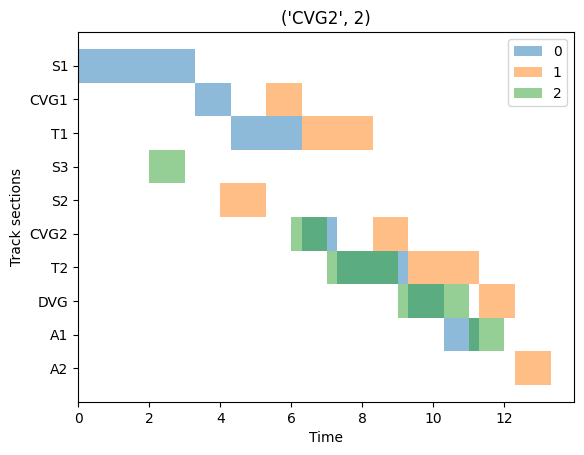

In [140]:
env.step(1)
env.render()
plt.title(earliest_conflict(env.schedule))

In [141]:
print(env.delayed_train)

1


In [128]:
def earliest_conflict(s):
    other_train = np.argmin([
        np.min(s.conflicts(train).stack())
        for train in range(s.num_trains)
        if not s.conflicts(train).stack().empty
    ])
    return s.first_conflict(other_train)

In [113]:
s = env.schedule
for train in range(s.num_trains):
    c = s.conflicts(train).stack()
    if not c.empty:
        print(train, c.index[np.argmin(c)], c.iloc[np.argmin(c)])

0 ('T1', 1) 6
1 ('T1', 0) 4.3
2 ('CVG2', 0) 6.3
